In [1]:
#PTB DATASET
#Convert all to csv then to txt
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import glob
import wfdb
import pandas as pd

E:\Downloads\ANACONDA3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Downloads\ANACONDA3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
E:\Downloads\ANACONDA3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
E:\Downloads\ANACONDA3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
ptb_path = r'ptb_ecg_db/*/*' ##all files
ptb_files = glob.glob(ptb_path)

In [3]:
#print(files)
len(ptb_files)

1647

In [4]:
ptb_files[289]
result = os.path.splitext(ptb_files[289])[0]
print(result)

ptb_ecg_db\patient032\s0165lre


In [5]:
ptb_record_list = [] ##use record list only
for i in range(len(ptb_files)):
    name = os.path.splitext(ptb_files[i])[0]
    ptb_record_list.append(wfdb.rdrecord(name, sampto=1000))
#annotation_ptb222 = wfdb.rdann('ptb_ecg_db/patient169/s0329lre', 'dat', sampto = 10000)###refer to CNN_input_gen

In [6]:
ptb_record_list[281]##true

In [7]:
ptb_df_list = []
for i in range(len(ptb_record_list)):
    ptb_df_list.append(pd.DataFrame(ptb_record_list[i].p_signal, columns=ptb_record_list[i].sig_name))
    name = 'ptb_ecg_db_csv/' + str(i) + '.csv'
    ptb_df_list[i].to_csv(name, index=False)

In [8]:
ptb_df_list[281]

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz
0,-0.1990,-0.6680,-0.4690,0.4335,0.1350,-0.5685,0.3580,0.3070,-0.0880,0.0215,-0.2285,-0.2725,-0.2225,-0.4500,-0.2180
1,-0.1885,-0.6615,-0.4720,0.4250,0.1415,-0.5670,0.3465,0.2995,-0.0955,0.0165,-0.2365,-0.2790,-0.2230,-0.4565,-0.2185
2,-0.1895,-0.6595,-0.4700,0.4245,0.1400,-0.5650,0.3555,0.3125,-0.0895,0.0190,-0.2345,-0.2785,-0.2240,-0.4515,-0.2195
3,-0.1890,-0.6645,-0.4750,0.4270,0.1430,-0.5700,0.3505,0.3010,-0.0915,0.0190,-0.2330,-0.2775,-0.2210,-0.4555,-0.2175
4,-0.1980,-0.6750,-0.4770,0.4365,0.1395,-0.5765,0.3510,0.2980,-0.0900,0.0220,-0.2290,-0.2755,-0.2215,-0.4620,-0.2150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.0920,-0.4030,-0.3110,0.2470,0.1095,-0.3570,0.1230,-0.0735,-0.3480,-0.0635,-0.1615,-0.1680,-0.1870,-0.2480,-0.1355
996,-0.1000,-0.4205,-0.3200,0.2600,0.1100,-0.3705,0.1265,-0.0720,-0.3460,-0.0615,-0.1590,-0.1670,-0.1870,-0.2640,-0.1360
997,-0.1030,-0.4250,-0.3220,0.2635,0.1095,-0.3735,0.1255,-0.0785,-0.3480,-0.0665,-0.1580,-0.1675,-0.1850,-0.2670,-0.1350
998,-0.1045,-0.4310,-0.3265,0.2675,0.1110,-0.3790,0.1240,-0.0795,-0.3490,-0.0670,-0.1570,-0.1675,-0.1830,-0.2770,-0.1320


In [9]:
for i in range(len(ptb_record_list)):
    name = 'ptb_ecg_db_csv/' + str(i) + '.csv'
    name2 = 'ptb_ecg_db_txt/' + str(i) + '.txt'
    with open(name, 'r') as f_in, open(name2, 'w') as f_out:
        content = f_in.read()
        f_out.write(content)

In [11]:
with open('ptb_ecg_db_txt/0.txt', 'r') as fin:
    data = fin.read().splitlines(True)
with open('ptb_ecg_db_txt/0.txt', 'w') as fout:
    fout.writelines(data[1:])

In [85]:
list1=[]
filepath="ptb_ecg_db_txt/0.txt"
with open(filepath, encoding="utf8") as fp:  
   for line in fp:
       list1.append(line.strip().split(','))

In [83]:
'''with open('ptb_ecg_db_txt/1.txt', 'r') as fin:
    data = fin.read().splitlines(True)
    data2 = fin.read().replace(',', '')
with open('ptb_ecg_db_txt/1.txt', 'w') as fout:
    fout.writelines(data2[1:])'''

In [48]:
#print(list1)
print(x)

[-0.2445 -0.229   0.0155 ... -0.0045 -0.173   0.0415]


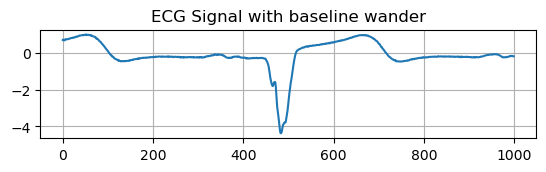

In [79]:
# Sampling Frequency
Fs = 1000

# Notch Frequency for baseline wander
Fnotch = 0.50
# Bandwidth
BW = 5
# Bandwidth Attenuation
Apass = 1

# Design notch filter to remove baseline wander
b, a = iirnotch(Fnotch / (Fs / 2), BW / (Fs / 2), Apass)
x = np.loadtxt('myfile.txt')
p = ptb_df_list[281]
x1 = p['v2']  #get first column all rows[:,1]
x2 = x1 / max(x1)

# Plot original ECG signal with baseline wander
plt.subplot(3, 1, 1)
plt.plot(x2)
plt.title('ECG Signal with baseline wander')
plt.grid(True)

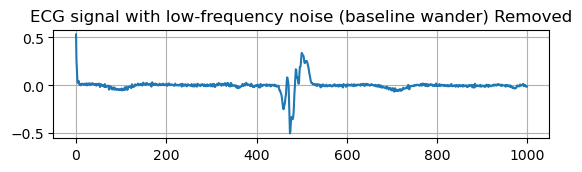

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, lfilter

# Sampling Frequency
Fs = 1000

# Notch Frequency for baseline wander
Fnotch = 0.50
# Bandwidth
BW = 5
# Bandwidth Attenuation
Apass = 1

# Design notch filter to remove baseline wander
b, a = iirnotch(Fnotch / (Fs / 2), BW / (Fs / 2), Apass)

# Apply the notch filter to the signal
y0 = lfilter(b, a, x2)

# Plot ECG signal with low-frequency noise (baseline wander) removed
plt.subplot(3, 1, 2)
plt.plot(y0)
plt.title('ECG signal with low-frequency noise (baseline wander) Removed')
plt.grid(True)

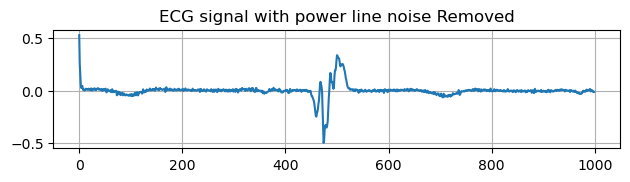

In [88]:
# Notch Frequency for power line noise
Fnotch = 50
# Bandwidth
BW = 5
# Bandwidth Attenuation
Apass = 1

# Design notch filter to remove power line noise
b, a = iirnotch(Fnotch / (Fs / 2), BW / (Fs / 2), Apass)

# Apply the notch filter to the signal
y1 = lfilter(b, a, y0)

# Plot ECG signal with power line noise removed
plt.subplot(3, 1, 3)
plt.plot(y1)
plt.title('ECG signal with power line noise Removed')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [93]:
y1

array([ 5.30233768e-01,  2.57219139e-01,  1.53530483e-01,  5.84001352e-02,
        2.46283247e-02,  3.76653649e-02,  4.43282541e-02,  1.57919436e-02,
        4.72781189e-03,  1.12021224e-02,  1.56924917e-03,  1.00093067e-03,
        8.50554208e-03,  1.75328812e-02,  9.20130014e-03,  1.36144785e-02,
        1.24316248e-02,  6.67054425e-03,  1.75755164e-02,  1.45195914e-02,
        7.80482120e-03,  2.68026802e-03,  1.04560761e-02,  2.04871913e-02,
        9.21482785e-03, -8.21911730e-04,  1.13603137e-02,  1.75922893e-02,
        9.56627079e-03,  1.67285763e-02,  2.04035013e-02,  4.16681984e-03,
        4.55563941e-03,  1.60063502e-02,  9.77707768e-03,  1.69925191e-02,
        2.15593107e-02,  2.13225972e-02,  9.13945582e-03,  9.00459721e-03,
        1.15544940e-02,  8.56392149e-03,  1.13862252e-02,  4.21689813e-03,
        1.18188693e-02, -4.14131769e-03,  5.89021665e-03,  1.36208559e-02,
        8.08925442e-03,  1.04811081e-02,  3.09313057e-03,  1.74929241e-02,
        4.13351105e-03, -

In [98]:
np.savetxt('myarray.txt', y1)

In [42]:
orders = []
with open('ptb_ecg_db_txt/0.txt') as data:
    for each_line in data:
        order = each_line.replace("\n", ",").strip()
        orders.append(order)
        #orders[each_line] = orders[each_line].replace(",", "  ")

In [43]:
orders[0]

'-0.2445,-0.229,0.0155,0.237,-0.13,-0.107,-0.044,-0.1205,-0.056,0.106,0.1965,0.195,-0.0015,0.06,-0.009,'

In [44]:
for i in range(len(orders)):
    orders[i] = orders[i].replace(",", "  ")

In [45]:
orders[5]

'-0.226  -0.2325  -0.007  0.2295  -0.1095  -0.12  -0.0505  -0.121  -0.053  0.1075  0.196  0.194  0.0  0.056  -0.0085  '

In [46]:
file1 = open('myfile.txt', 'w')
 
# Writing a string to file
file1.writelines(orders)